# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


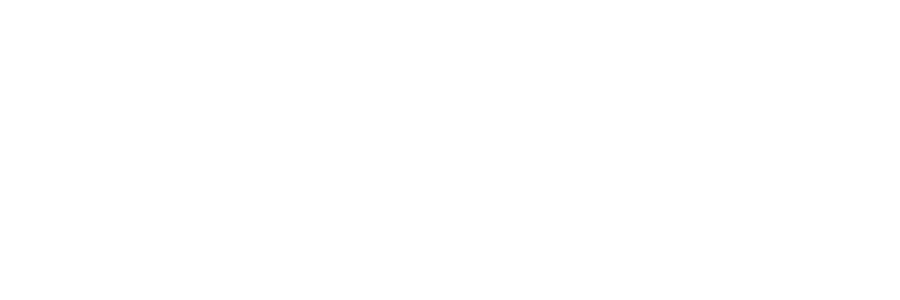

In [1]:
# course code
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


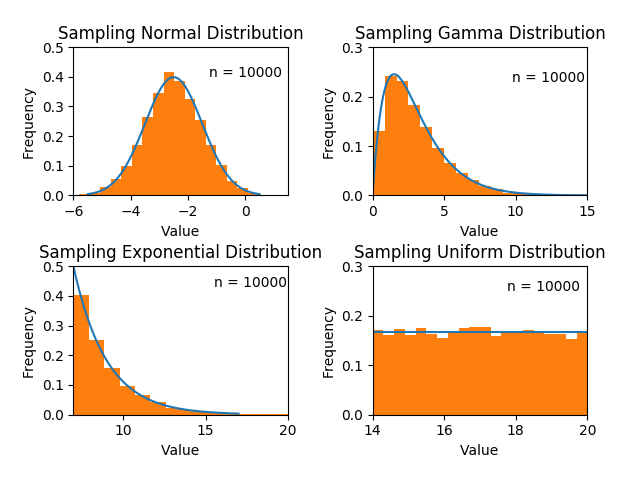

In [2]:
# my code
# animation to show how more samples gets closer to 'ideal' distribuitons
# imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import matplotlib.mlab as mlab
import math
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# set up subplots and table data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.tight_layout(pad=3, w_pad=3, h_pad=3)
curveType = ['Normal', 'Gamma', 'Exponential', 'Uniform']
axs = [ax1, ax2, ax3, ax4]
data = [x1, x2, x3, x4]
bins = 20
n = len(x1)    # data set size

# plot the smooth curves of the 4 data types
mu = -2.5
sigma = math.sqrt(1)
xl1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 10000)
def smooth1(): ax1.plot(xl1,mlab.normpdf(xl1, mu, sigma))
# 2
xl2 = np.linspace (0, 18, 10000) 
def smooth2(): ax2.plot(xl2, stats.gamma.pdf(xl2,2, scale = 1.5))

xl3 = np.linspace(7, 17, 10000)
y3 = stats.expon.pdf(xl3, 7, 2)
def smooth3(): ax3.plot(xl3,y3)
# 4
def smooth4():
    ax4.plot([14,20], [1/(20-14), 1/(20-14)])
    
# table the smooth curves
smooth ={ '0': smooth1, '1' : smooth2, '2' : smooth3, '3': smooth4 }
annotation = [ [-1.25,0.4], [9.75, 0.23], [15.50, 0.43], [17.75, 0.25] ]

# set up animation for histogram
substeps = 200
steps = n / substeps
def update(curr):
    for i in range(0,len(axs)):
        axs[i].cla()    
        smooth[str(i)]()
        axs[i].hist(data[i][:(curr*substeps)], normed = True, bins = bins)
        if i == 0: ax1.axis([-6,1.5,0,0.5])
        elif i == 1: ax2.axis([0,15,0,0.3])
        elif i == 2: ax3.axis([7,20,0,0.5])
        elif i == 3: ax4.axis([14,20,0,0.3])
        axs[i].set_title('Sampling {} Distribution'.format(curveType[i]))
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlabel('Value')
        axs[i].annotate('n = {}'.format(curr*substeps), annotation[i])
        fig.show()
        # stop if at end
        if curr == steps: a.event_source.stop()
        
# plot histograms
a = animation.FuncAnimation(fig, update, interval=500)

    
